In [1]:
#importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("C:/Users/subra/Desktop/Temp/movie_metadata.csv")

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
numerical_features = data.select_dtypes(exclude=['object']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [6]:
numdata=data[numerical_features]

In [7]:
numdata

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,11000.0,6.2,2.35,0
7,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,1.0,387.0,260000000.0,2010.0,553.0,7.8,1.85,29000
8,635.0,141.0,0.0,19000.0,26000.0,458991599.0,462669,92000,4.0,1117.0,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795,58753,3.0,973.0,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [8]:
data.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
cast_total_facebook_likes      0
dtype: int64

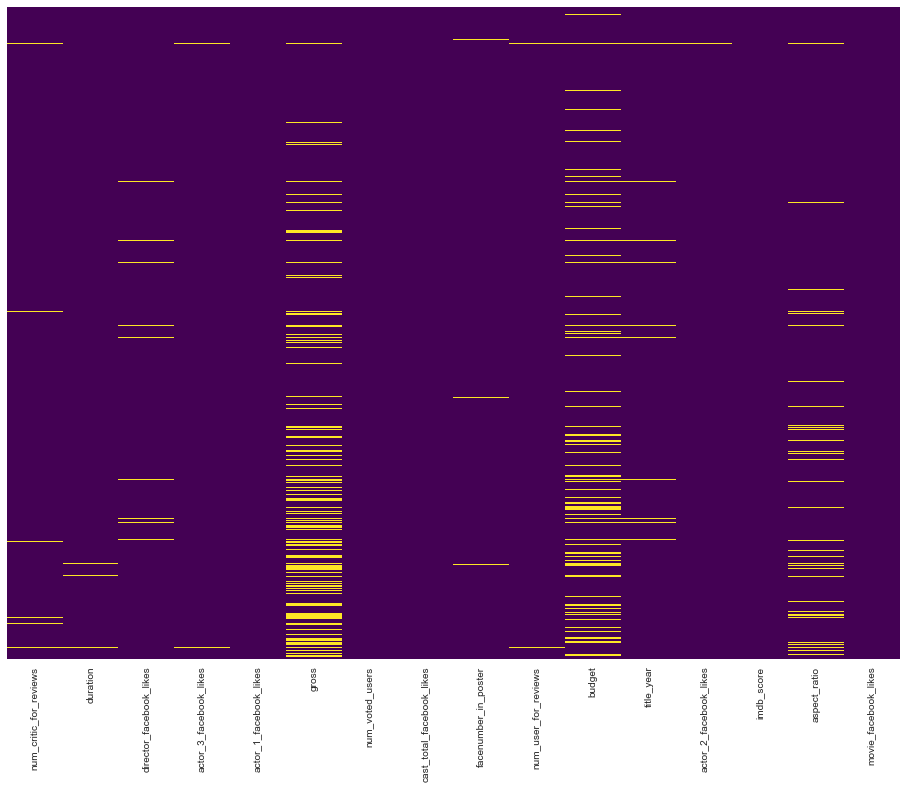

In [9]:
fig=plt.figure(figsize=(16,12))
sns.heatmap(numdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
numdata.fillna(numdata.median(),inplace = True)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,110.0,103.0,131.0,371.5,131.0,25517500.0,8,143,0.0,156.0,20000000.0,2005.0,12.0,7.1,2.35,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,11000.0,6.2,2.35,0
7,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,1.0,387.0,260000000.0,2010.0,553.0,7.8,1.85,29000
8,635.0,141.0,0.0,19000.0,26000.0,458991599.0,462669,92000,4.0,1117.0,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795,58753,3.0,973.0,250000000.0,2009.0,11000.0,7.5,2.35,10000


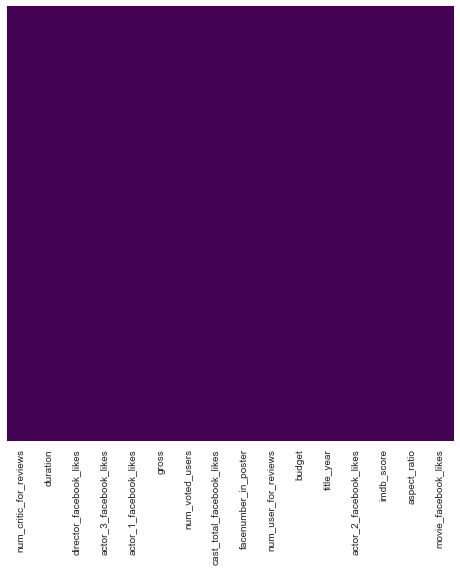

In [11]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(numdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
data['imdb_score'] = data['imdb_score'].apply(lambda x:int(round(x)))

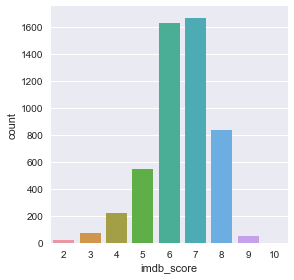

In [13]:
fig=plt.figure(figsize=(40,30))
sns.factorplot('imdb_score',kind='count',data=data)

In [14]:
tmp = data['language'].value_counts()
lang_list=tmp[tmp>3].index.tolist()
lang_list

['English',
 'French',
 'Spanish',
 'Hindi',
 'Mandarin',
 'German',
 'Japanese',
 'Italian',
 'Russian',
 'Cantonese',
 'Portuguese',
 'Korean',
 'Hebrew',
 'Swedish',
 'Arabic',
 'Danish',
 'Norwegian',
 'Polish',
 'Dutch',
 'Persian']

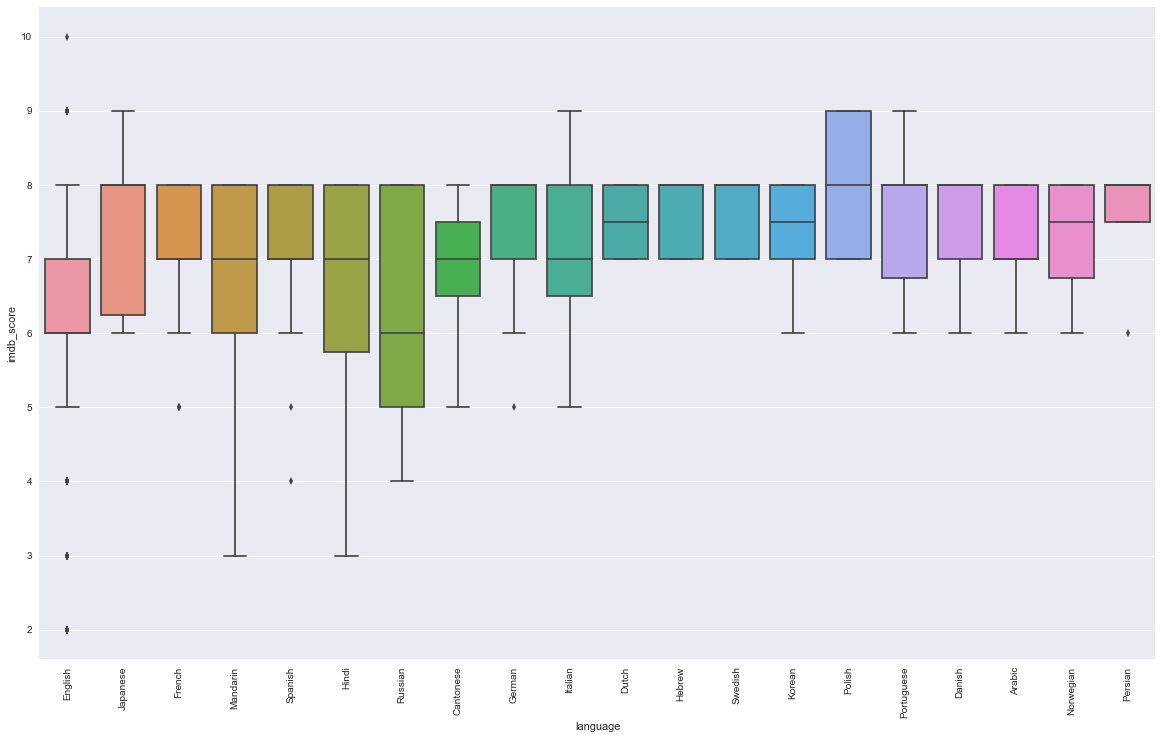

In [15]:
plt.figure(figsize = (20, 12))
sns.boxplot(x = 'language',y='imdb_score', data = data[data['language'].isin(lang_list)])
xt = plt.xticks(rotation=90)

In [16]:
data[data['language'].isin(lang_list)].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,8,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,7,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,7,2.35,24000


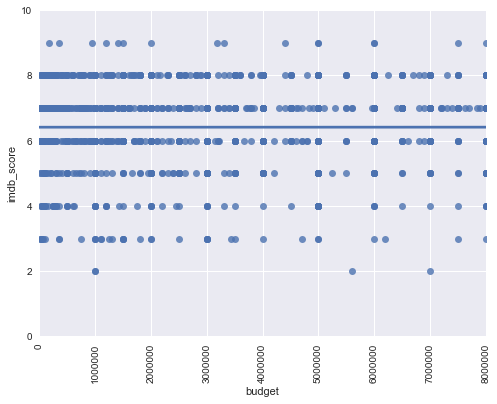

In [17]:
f, axis = plt.subplots(figsize=(8, 6))
#fig=plt.figure(figsize=(20,10))
fig=sns.regplot(x='budget',y='imdb_score',data=data)
xt = plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=10);
fig.axis(xmin=0, xmax=8000000);

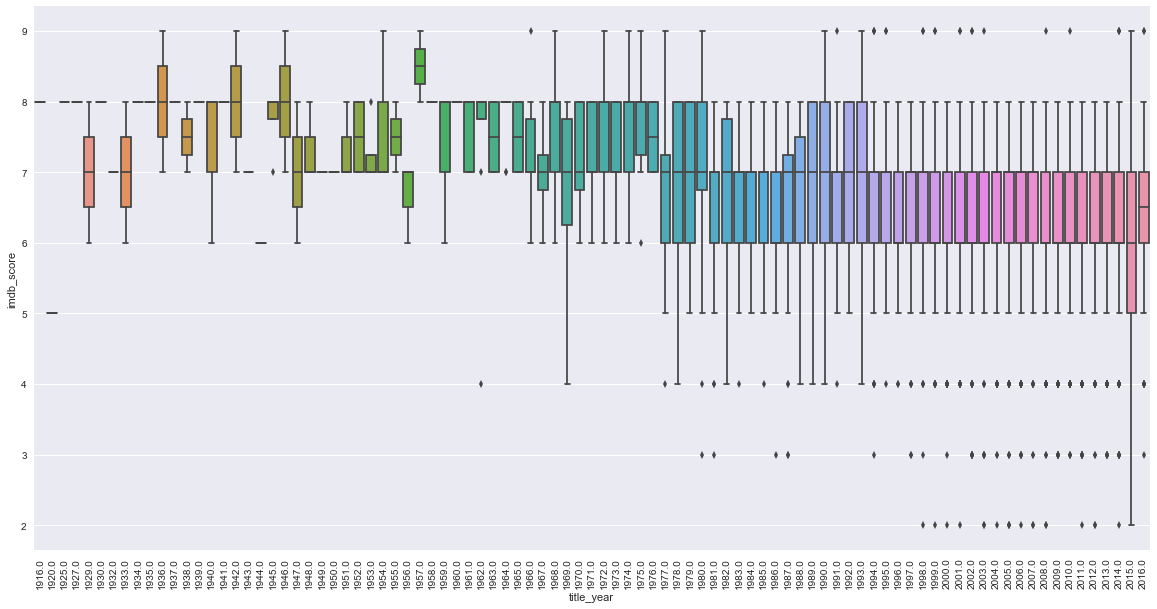

In [18]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(x='title_year',y='imdb_score',data=data,width=0.8)
xt = plt.xticks(rotation=90)

In [19]:
allyears=data['title_year']

In [20]:
decade=[1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2016]
decadecat=pd.cut(allyears,decade)
yearcount=pd.value_counts(decadecat)

In [21]:
yearcount

(2000, 2010]    2159
(2010, 2016]    1267
(1990, 2000]     927
(1980, 1990]     297
(1970, 1980]     126
(1960, 1970]      82
(1950, 1960]      30
(1940, 1950]      21
(1930, 1940]      19
(1920, 1930]       5
(1910, 1920]       2
Name: title_year, dtype: int64

# IMDB Score vs Movie Year

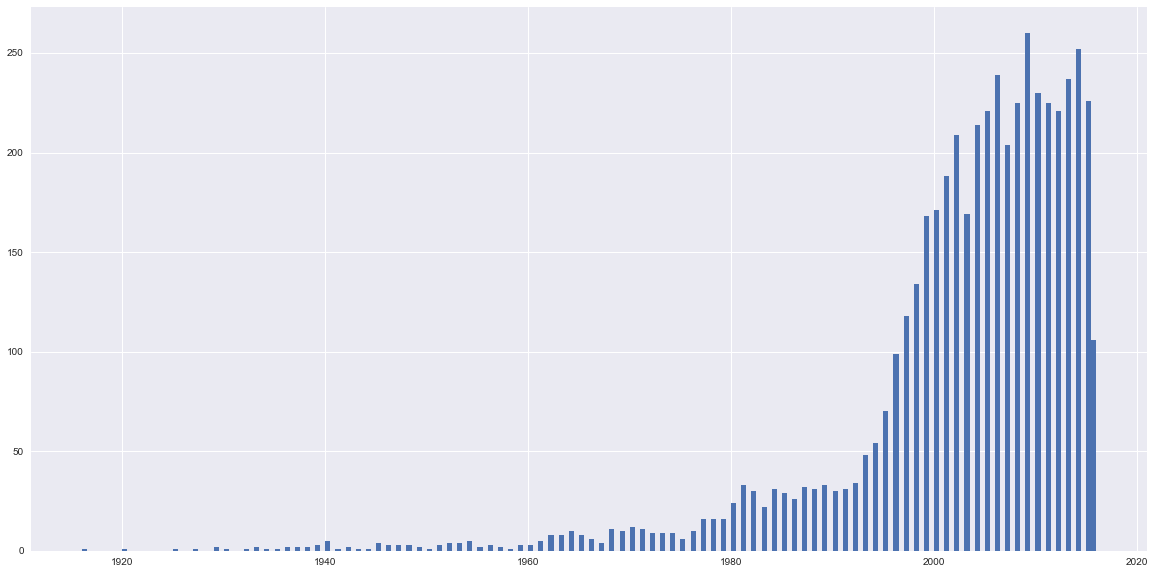

In [22]:
fig=plt.figure(figsize=(20,10))
data['title_year'].hist(bins=200)

# IMDB Score vs Facebook Popularity

(0, 250000)

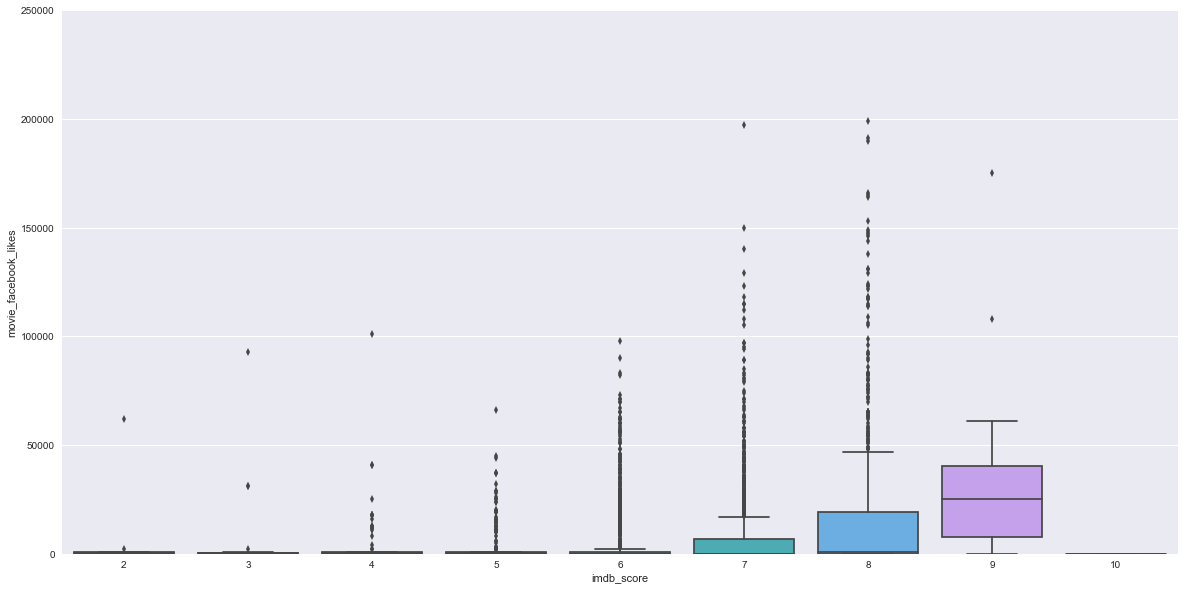

In [23]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(x='imdb_score',y='movie_facebook_likes',data=data)
plt.ylim(0,250000)

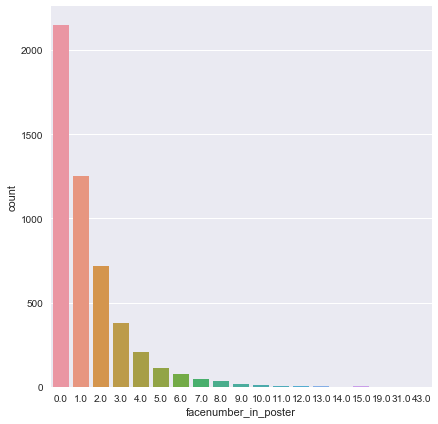

In [24]:
sns.factorplot('facenumber_in_poster',kind='count',data=data, size=6)

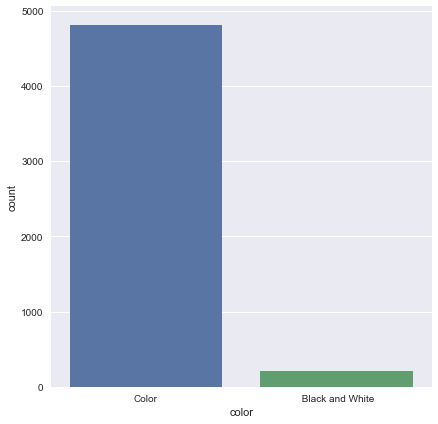

In [25]:
sns.factorplot('color',kind='count',data=data, size=6)

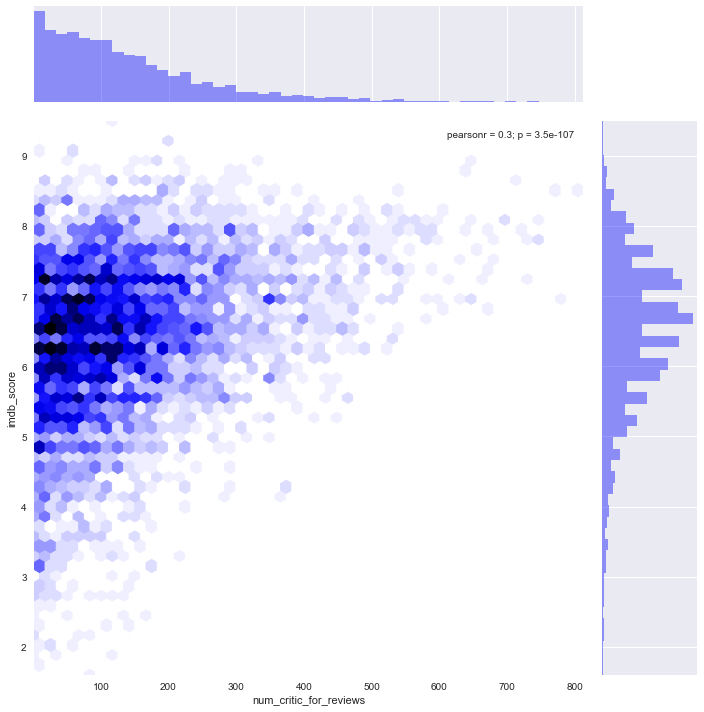

In [26]:
sns.jointplot(x='num_critic_for_reviews',y='imdb_score',data=numdata,kind='hex',size=10,dropna=True,color='B')

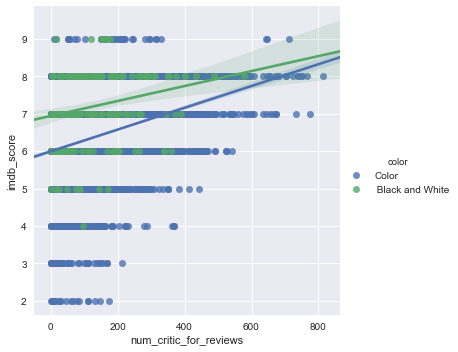

In [27]:
sns.lmplot(x='num_critic_for_reviews',y='imdb_score',data=data,hue='color')

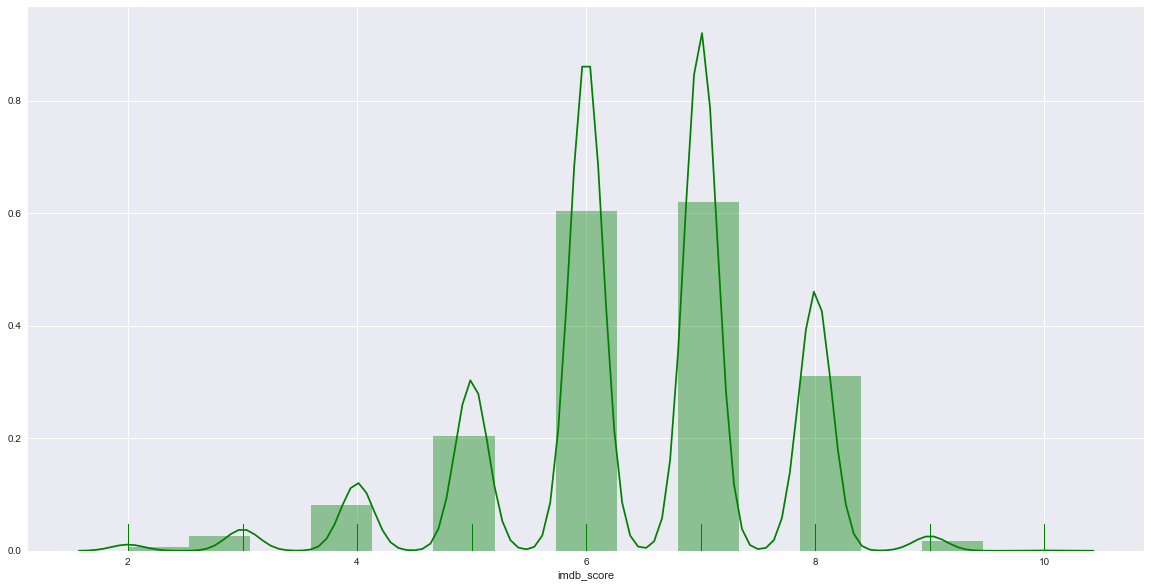

In [28]:
fig=plt.figure(figsize=(20,10))
sns.distplot(data['imdb_score'],bins=15,rug=True,color='g')

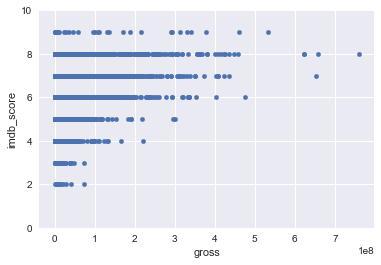

In [29]:
fig=plt.figure(figsize=(20,10))
data.plot.scatter(x='gross', y='imdb_score', ylim=(0,10));

In [30]:
y=data['imdb_score']

In [31]:
corrm=numdata.corr()
corrm

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.257531,0.183657,0.271857,0.191033,0.486001,0.625106,0.263886,-0.033749,0.609531,0.121572,0.266797,0.282912,0.302465,-0.053660,0.683412
duration,0.257531,1.000000,0.162048,0.123717,0.088779,0.231116,0.314881,0.123160,0.013068,0.328020,0.069681,-0.127405,0.132069,0.260965,-0.089716,0.196726
director_facebook_likes,0.183657,0.162048,1.000000,0.121046,0.092232,0.145844,0.297940,0.120986,-0.041472,0.223538,0.022747,-0.064740,0.120900,0.162838,-0.015580,0.162060
actor_3_facebook_likes,0.271857,0.123717,0.121046,1.000000,0.250095,0.315926,0.287418,0.473973,0.099764,0.230540,0.049163,0.094854,0.559730,0.052243,-0.005114,0.278979
actor_1_facebook_likes,0.191033,0.088779,0.092232,0.250095,1.000000,0.155214,0.193047,0.951657,0.072615,0.146159,0.024839,0.084880,0.390642,0.075866,-0.019706,0.135503
gross,0.486001,0.231116,0.145844,0.315926,0.155214,1.000000,0.639502,0.246457,-0.025026,0.565541,0.112482,0.040477,0.273519,0.173977,-0.013117,0.384643
num_voted_users,0.625106,0.314881,0.297940,0.287418,0.193047,0.639502,1.000000,0.265911,-0.026885,0.798417,0.083001,0.005641,0.271030,0.410965,-0.018282,0.537924
cast_total_facebook_likes,0.263886,0.123160,0.120986,0.473973,0.951657,0.246457,0.265911,1.000000,0.091589,0.207388,0.038935,0.108048,0.628478,0.085787,-0.018570,0.209786
facenumber_in_poster,-0.033749,0.013068,-0.041472,0.099764,0.072615,-0.025026,-0.026885,0.091589,1.000000,-0.068690,-0.018868,0.060922,0.071720,-0.062679,0.013235,0.008577
num_user_for_reviews,0.609531,0.328020,0.223538,0.230540,0.146159,0.565541,0.798417,0.207388,-0.068690,1.000000,0.087918,-0.005970,0.220055,0.290824,-0.028308,0.400888


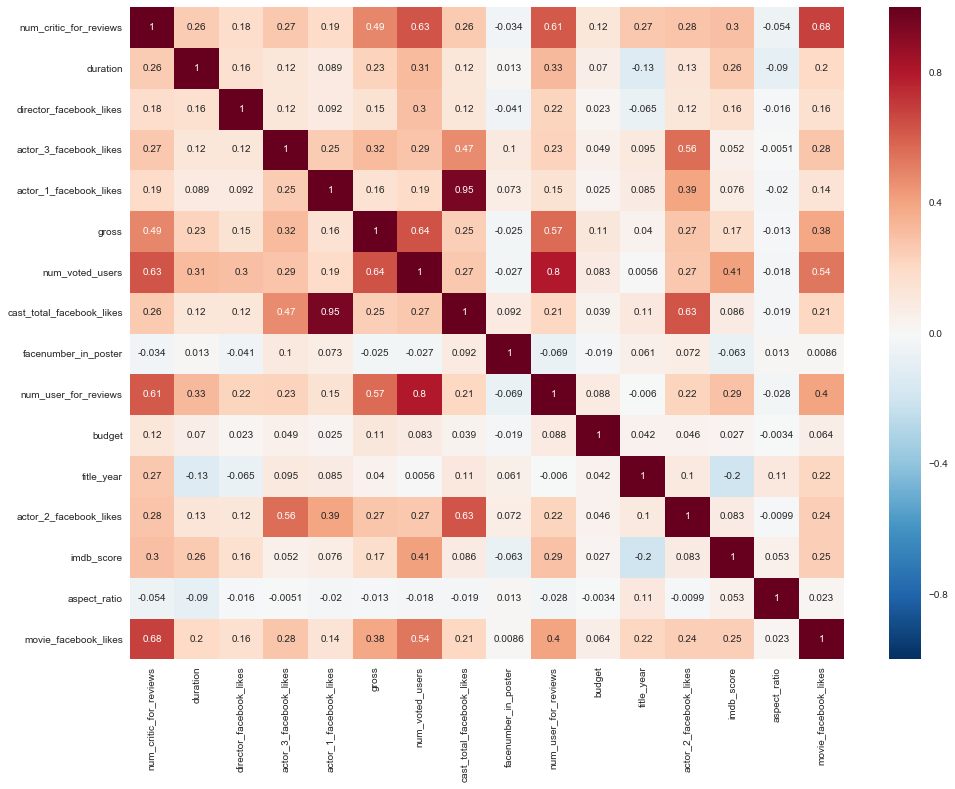

In [32]:
fig=plt.figure(figsize=(16,12))
sns.heatmap(numdata.corr(),annot=True)

In [33]:
topcor=corrm.index[abs(corrm['imdb_score'])>0.1]

In [34]:
numdata=numdata[topcor]

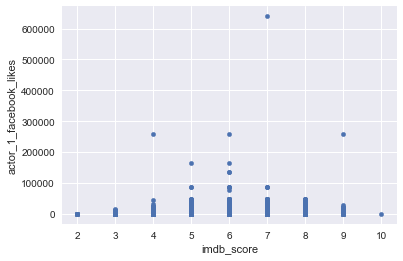

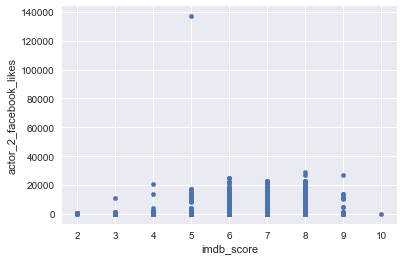

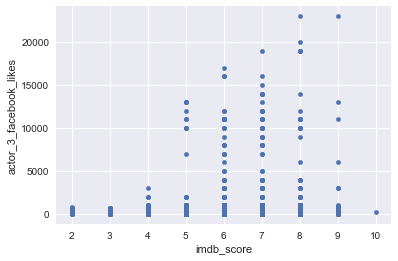

In [35]:
data.plot.scatter('imdb_score','actor_1_facebook_likes')
data.plot.scatter('imdb_score','actor_2_facebook_likes')
data.plot.scatter('imdb_score','actor_3_facebook_likes')

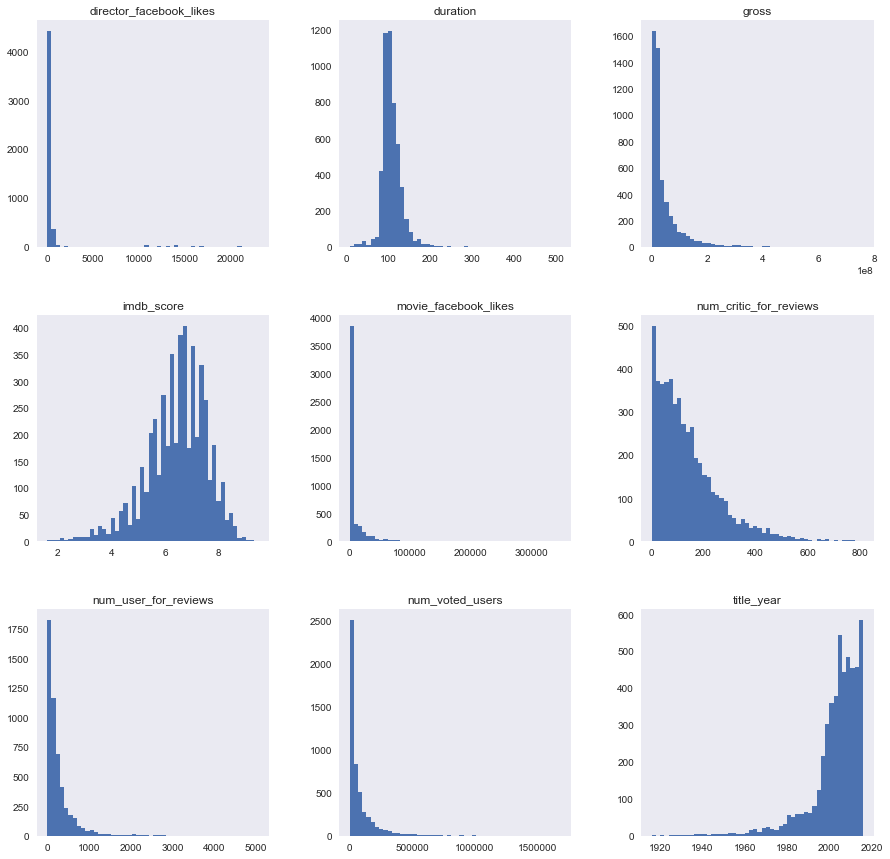

In [36]:
pd.DataFrame.hist(numdata, figsize = [15,15],grid=False, xlabelsize=10, ylabelsize=10,bins=50);

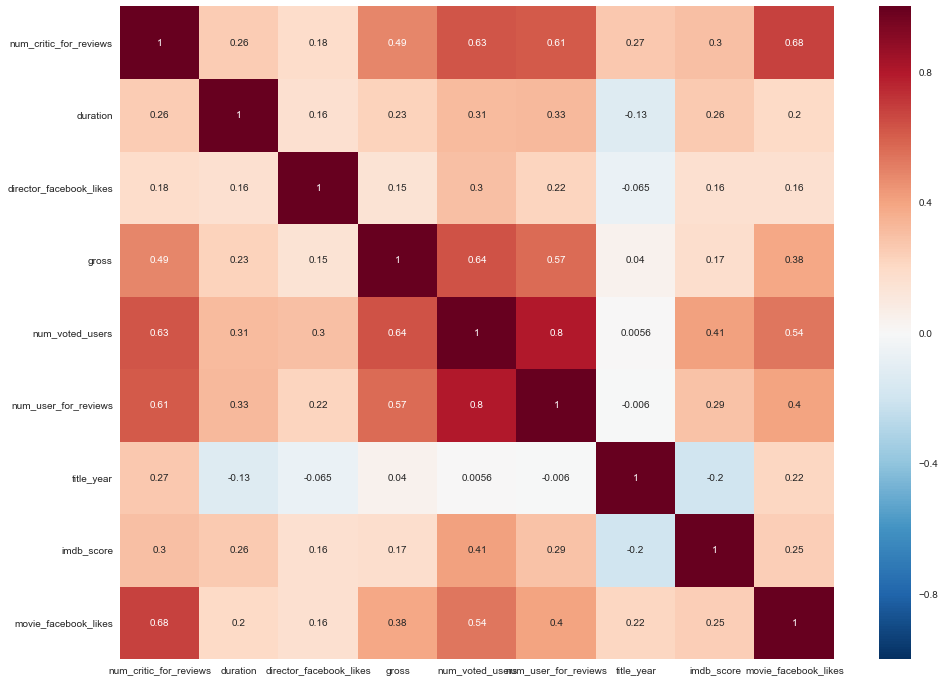

In [38]:
fig=plt.figure(figsize=(16,12))
sns.heatmap(numdata.corr(),annot=True)

In [40]:
numdata.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'num_user_for_reviews', 'title_year',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [111]:
numdata = numdata[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'num_user_for_reviews', 'title_year',
        'movie_facebook_likes']]

In [112]:
numdata

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,title_year,movie_facebook_likes
0,723.0,178.0,0.0,760505847.0,886204,3054.0,2009.0,33000
1,302.0,169.0,563.0,309404152.0,471220,1238.0,2007.0,0
2,602.0,148.0,0.0,200074175.0,275868,994.0,2015.0,85000
3,813.0,164.0,22000.0,448130642.0,1144337,2701.0,2012.0,164000
4,110.0,103.0,131.0,25517500.0,8,156.0,2005.0,0
5,462.0,132.0,475.0,73058679.0,212204,738.0,2012.0,24000
6,392.0,156.0,0.0,336530303.0,383056,1902.0,2007.0,0
7,324.0,100.0,15.0,200807262.0,294810,387.0,2010.0,29000
8,635.0,141.0,0.0,458991599.0,462669,1117.0,2015.0,118000
9,375.0,153.0,282.0,301956980.0,321795,973.0,2009.0,10000


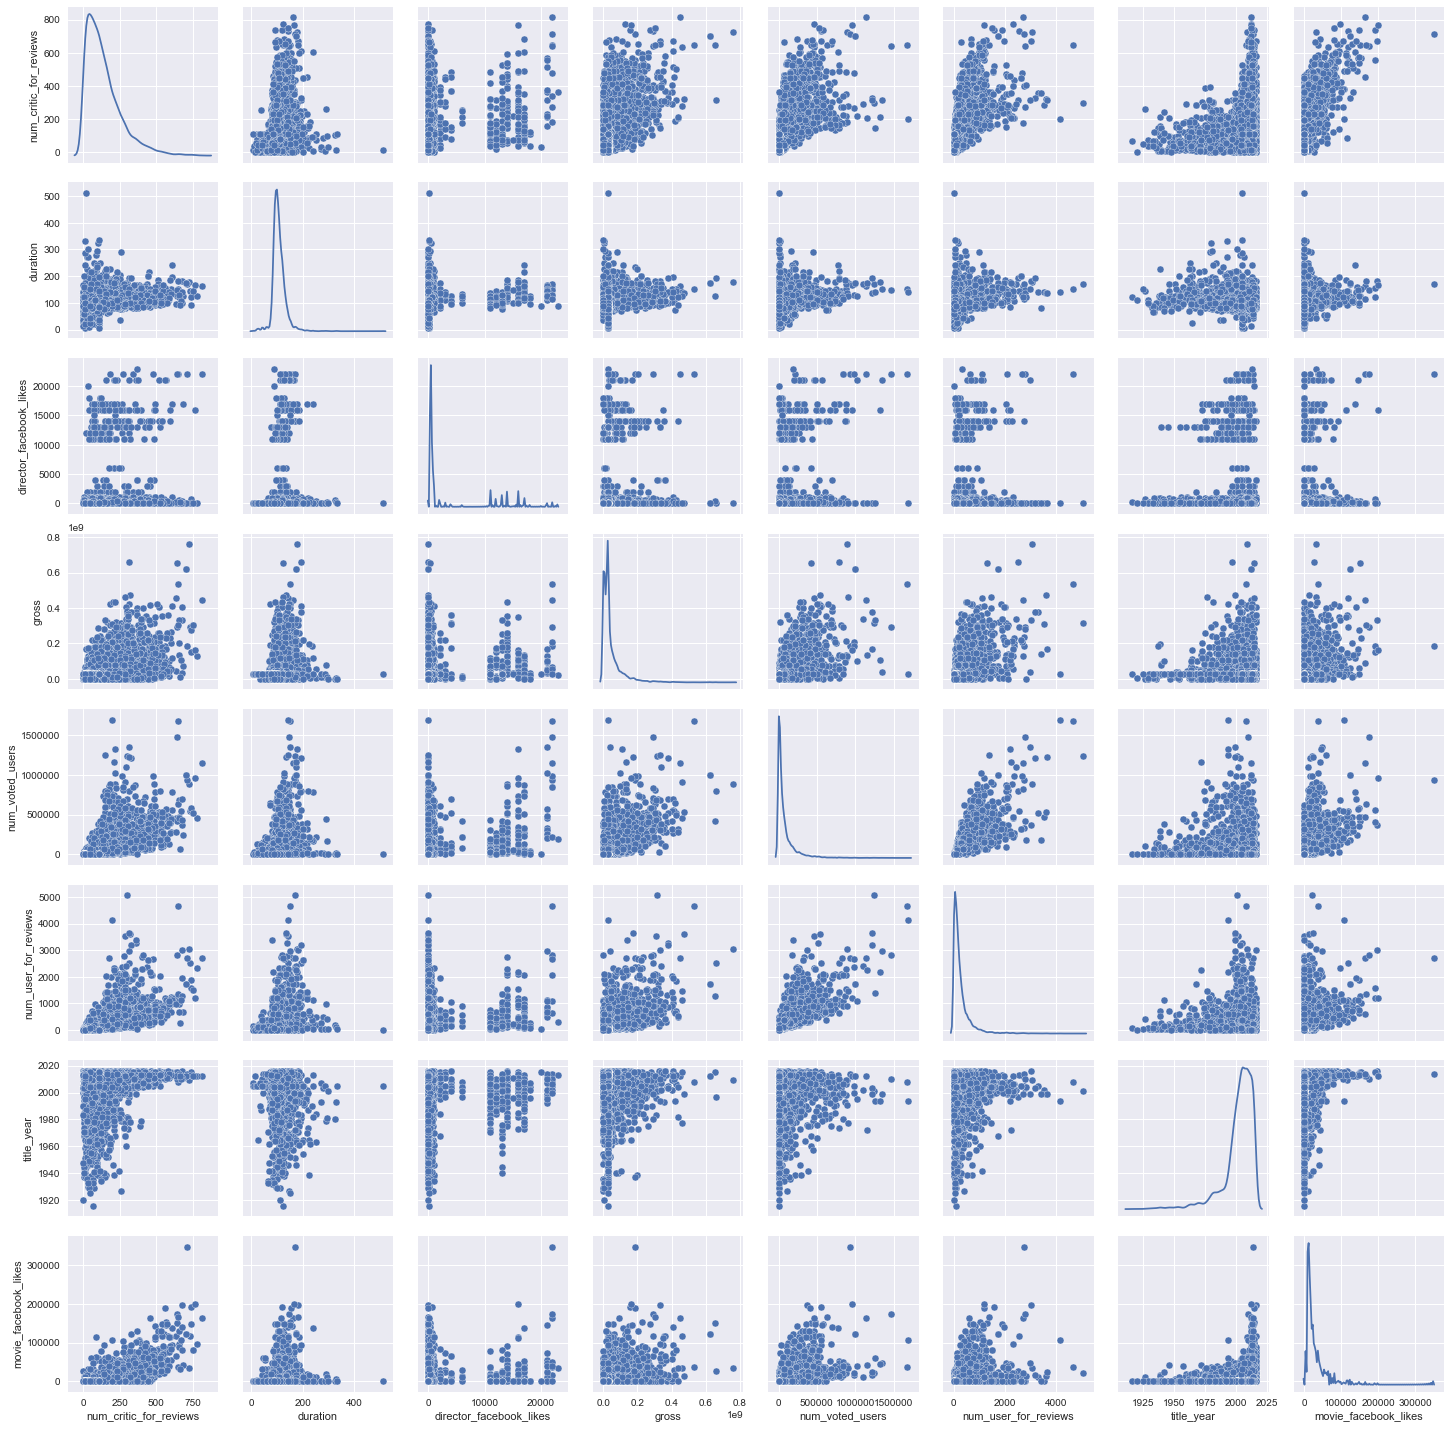

In [113]:
sns.pairplot(numdata,diag_kind='kde',palette='husl')

In [114]:
categorical_features

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [115]:
catdata = data[categorical_features]

In [116]:
catdata.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN


In [117]:
#missing data
total = catdata.isnull().sum().sort_values(ascending=False)
percent = (catdata.isnull().sum()/catdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
content_rating,303,0.060083
plot_keywords,153,0.030339
director_name,104,0.020623
actor_3_name,23,0.004561
color,19,0.003768
actor_2_name,13,0.002578
language,12,0.002380
actor_1_name,7,0.001388
country,5,0.000991
movie_imdb_link,0,0.000000


In [118]:
catdata.fillna(value = 'NULL',inplace = True)

In [119]:
df_genres = pd.DataFrame(catdata['genres'])
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)] )
catdata.drop('genres',inplace = True, axis = 1)
catdata = catdata.merge(df_genres,left_index = True,right_index = True)

In [120]:
catdata.head()

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None,None,None
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,Action,Adventure,Thriller,None,None,None,None,None
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,Action,Thriller,None,None,None,None,None,None
4,NULL,Doug Walker,Rob Walker,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NULL,NULL,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NULL,NULL,NULL,Documentary,None,None,None,None,None,None,None


In [121]:
catdata.drop(['movie_imdb_link','Genre_6','Genre_7'],inplace = True, axis = 1)

In [122]:
catdata

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,plot_keywords,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,Action,Adventure,Thriller,None,None,None
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,Action,Thriller,None,None,None,None
4,NULL,Doug Walker,Rob Walker,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NULL,NULL,NULL,NULL,NULL,Documentary,None,None,None,None,None
5,Color,Andrew Stanton,Samantha Morton,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,Action,Adventure,Sci-Fi,None,None,None
6,Color,Sam Raimi,James Franco,J.K. Simmons,Spider-Man 3,Kirsten Dunst,sandman|spider man|symbiote|venom|villain,English,USA,PG-13,Action,Adventure,Romance,None,None,None
7,Color,Nathan Greno,Donna Murphy,Brad Garrett,Tangled,M.C. Gainey,17th century|based on fairy tale|disney|flower...,English,USA,PG,Adventure,Animation,Comedy,Family,Fantasy,Musical
8,Color,Joss Whedon,Robert Downey Jr.,Chris Hemsworth,Avengers: Age of Ultron,Scarlett Johansson,artificial intelligence|based on comic book|ca...,English,USA,PG-13,Action,Adventure,Sci-Fi,None,None,None
9,Color,David Yates,Daniel Radcliffe,Alan Rickman,Harry Potter and the Half-Blood Prince,Rupert Grint,blood|book|love|potion|professor,English,UK,PG,Adventure,Family,Fantasy,Mystery,None,None


In [123]:
from pandas import DataFrame,Series
catdata.columns

Index(['color', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title',
       'actor_3_name', 'plot_keywords', 'language', 'country',
       'content_rating', 'Genre_0', 'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4',
       'Genre_5'],
      dtype='object')

In [124]:
catdata['director_name'].value_counts().head()

NULL                104
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Name: director_name, dtype: int64

In [125]:
#missing data
total = catdata.isnull().sum().sort_values(ascending=False)
percent = (catdata.isnull().sum()/catdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Genre_5,4946,0.980765
Genre_4,4597,0.911561
Genre_3,3616,0.717034
Genre_2,1988,0.394210
Genre_1,633,0.125521
Genre_0,0,0.000000
content_rating,0,0.000000
country,0,0.000000
language,0,0.000000
plot_keywords,0,0.000000


In [126]:
tmp = data['country'].value_counts()
count_list=tmp[tmp>50].index.tolist()
count_list


['USA', 'UK', 'France', 'Canada', 'Germany', 'Australia']

In [127]:
x=data[data['country'].isin(count_list)]

In [128]:
x

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,8,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,7,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,7,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,8,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,8,2.35,10000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,7,2.35,197000


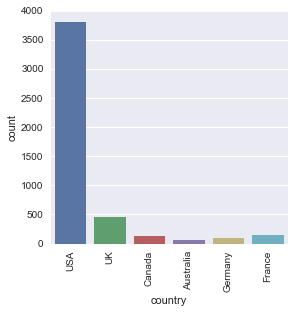

In [129]:
plt.figure(figsize = (30, 30))
sns.factorplot('country',kind='count',data=x)
xt = plt.xticks(rotation=90)

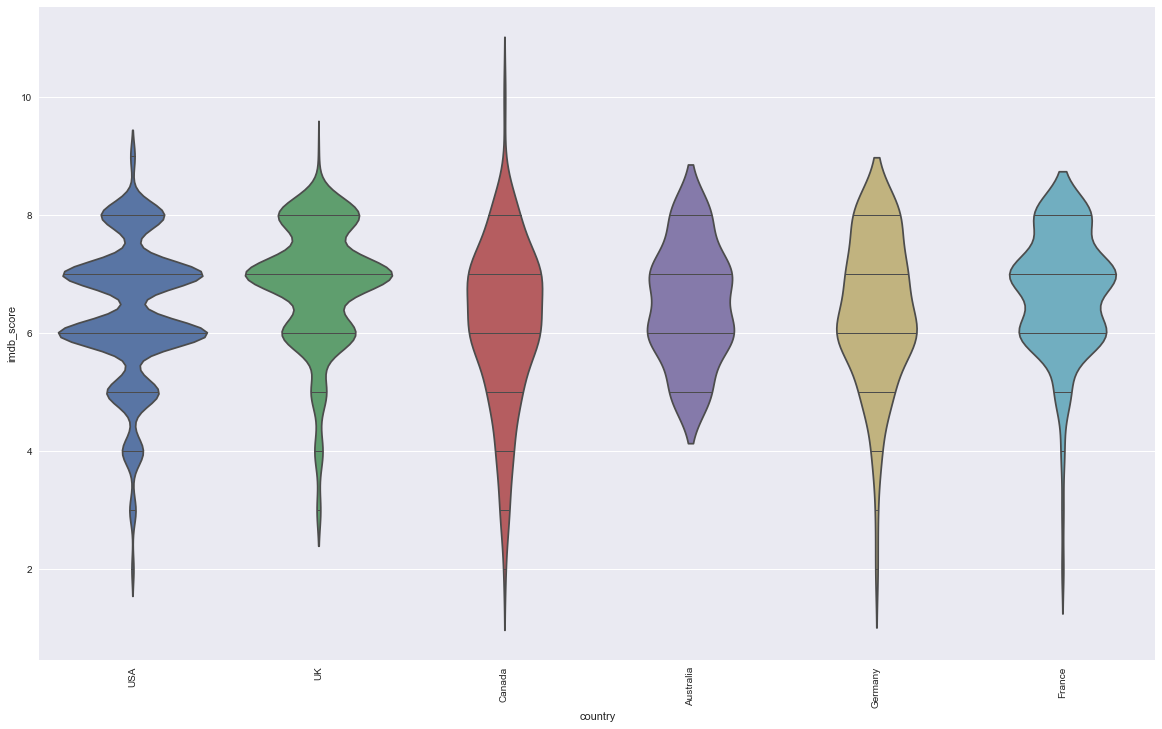

In [130]:
plt.figure(figsize = (20, 12))
sns.violinplot(x = 'country',y='imdb_score', data = data[data['country'].isin(count_list)],inner="stick")
xt = plt.xticks(rotation=90)

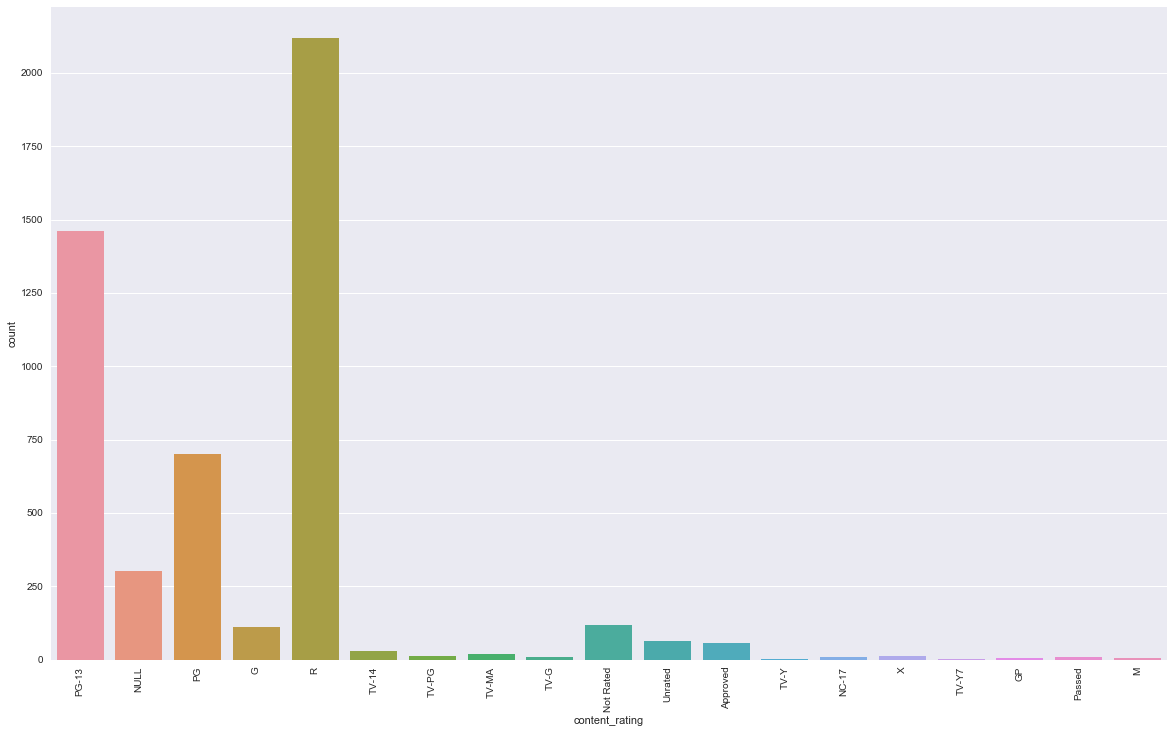

In [131]:
plt.figure(figsize = (20, 12))
sns.countplot(x = catdata['content_rating'], data = catdata)
xt = plt.xticks(rotation=90)

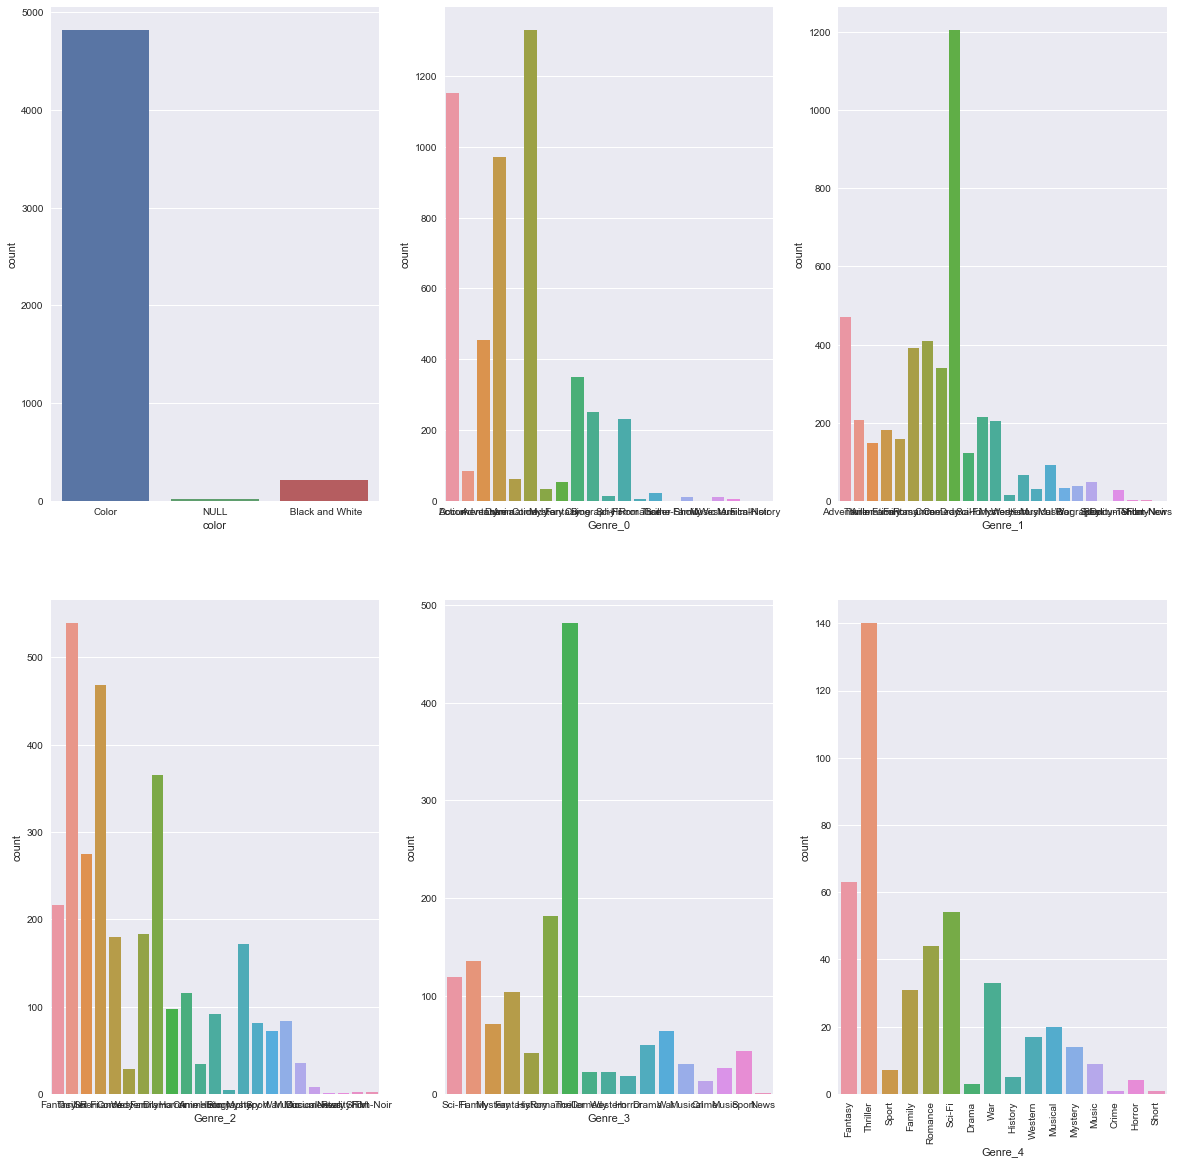

In [132]:
fig, ax = plt.subplots(figsize=(20,20), ncols=3, nrows=2)
sns.countplot(data = catdata, x= 'color', ax = ax[0][0])
sns.countplot(data = catdata, x= 'Genre_0', ax = ax[0][1])
sns.countplot(data = catdata, x= 'Genre_1', ax = ax[0][2])
sns.countplot(data = catdata, x= 'Genre_2', ax = ax[1][0])
sns.countplot(data = catdata, x= 'Genre_3', ax = ax[1][1])
sns.countplot(data = catdata, x= 'Genre_4', ax = ax[1][2])
xt=plt.xticks(rotation=90);


In [133]:
catdata.drop([])

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,plot_keywords,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,Action,Adventure,Thriller,None,None,None
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,Action,Thriller,None,None,None,None
4,NULL,Doug Walker,Rob Walker,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NULL,NULL,NULL,NULL,NULL,Documentary,None,None,None,None,None
5,Color,Andrew Stanton,Samantha Morton,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,Action,Adventure,Sci-Fi,None,None,None
6,Color,Sam Raimi,James Franco,J.K. Simmons,Spider-Man 3,Kirsten Dunst,sandman|spider man|symbiote|venom|villain,English,USA,PG-13,Action,Adventure,Romance,None,None,None
7,Color,Nathan Greno,Donna Murphy,Brad Garrett,Tangled,M.C. Gainey,17th century|based on fairy tale|disney|flower...,English,USA,PG,Adventure,Animation,Comedy,Family,Fantasy,Musical
8,Color,Joss Whedon,Robert Downey Jr.,Chris Hemsworth,Avengers: Age of Ultron,Scarlett Johansson,artificial intelligence|based on comic book|ca...,English,USA,PG-13,Action,Adventure,Sci-Fi,None,None,None
9,Color,David Yates,Daniel Radcliffe,Alan Rickman,Harry Potter and the Half-Blood Prince,Rupert Grint,blood|book|love|potion|professor,English,UK,PG,Adventure,Family,Fantasy,Mystery,None,None


In [134]:
catdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
color             5043 non-null object
director_name     5043 non-null object
actor_2_name      5043 non-null object
actor_1_name      5043 non-null object
movie_title       5043 non-null object
actor_3_name      5043 non-null object
plot_keywords     5043 non-null object
language          5043 non-null object
country           5043 non-null object
content_rating    5043 non-null object
Genre_0           5043 non-null object
Genre_1           4410 non-null object
Genre_2           3055 non-null object
Genre_3           1427 non-null object
Genre_4           446 non-null object
Genre_5           97 non-null object
dtypes: object(16)
memory usage: 630.5+ KB


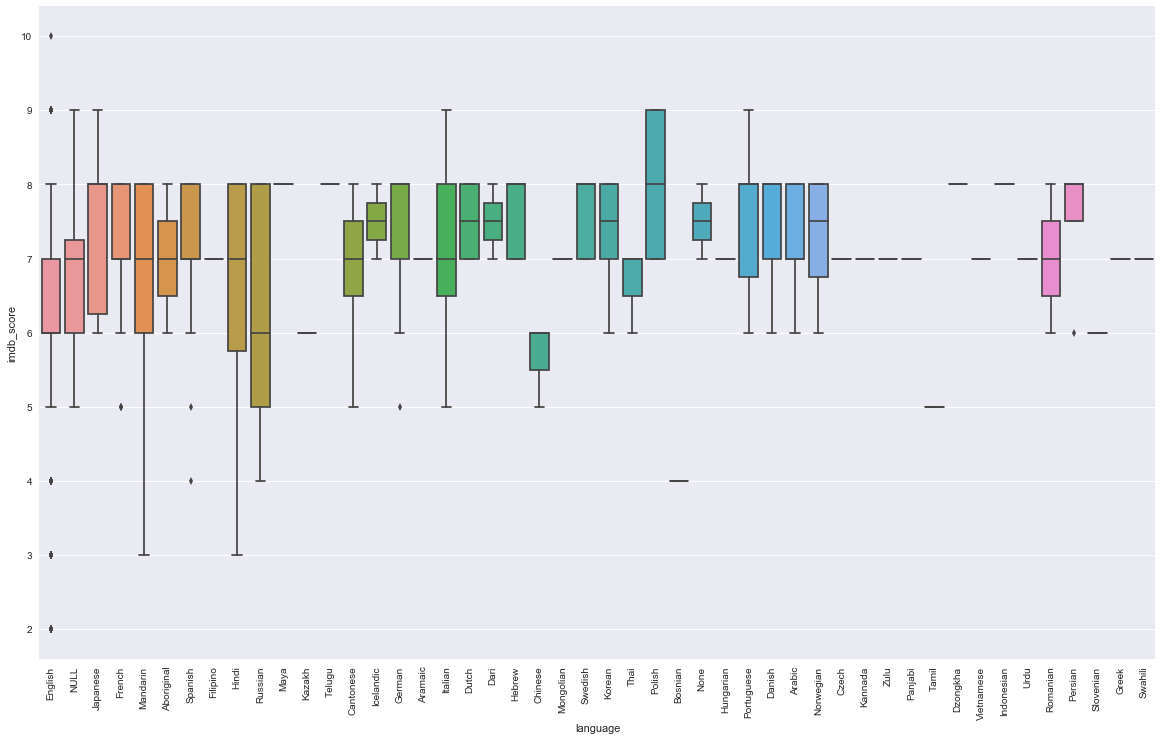

In [135]:
plt.figure(figsize = (20, 12))
sns.boxplot(x = catdata['language'], y = data['imdb_score'])
xt=plt.xticks(rotation=90);

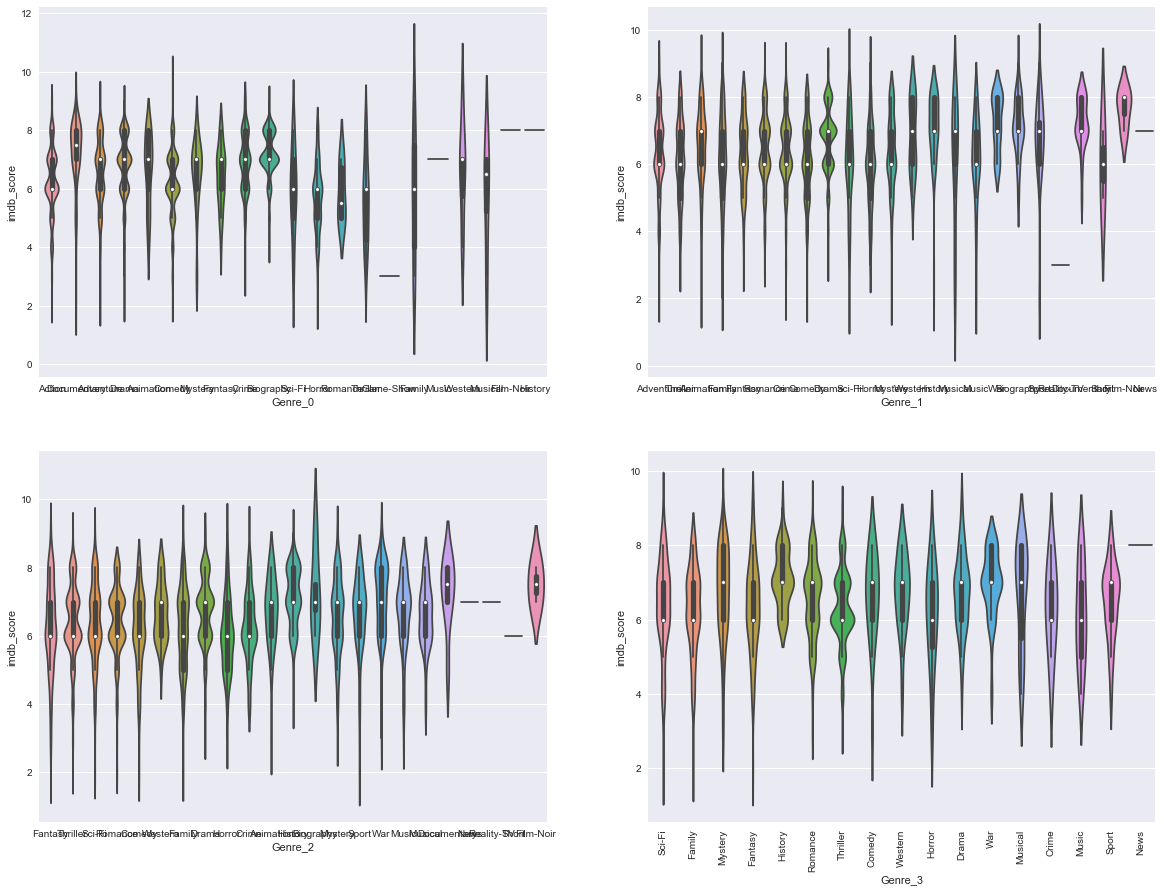

In [136]:
fig, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.violinplot(x = catdata['Genre_0'], y = data['imdb_score'],  ax = ax[0][0])
xt=plt.xticks(rotation=90);
sns.violinplot(x = catdata['Genre_1'], y = data['imdb_score'], ax = ax[0][1])
xt=plt.xticks(rotation=90);
sns.violinplot(x = catdata['Genre_2'], y = data['imdb_score'],  ax = ax[1][0])
xt=plt.xticks(rotation=90);
sns.violinplot(x = catdata['Genre_3'], y = data['imdb_score'], ax = ax[1][1])
xt=plt.xticks(rotation=90);

In [137]:
catdata = pd.get_dummies(catdata,columns=['color','language','country','content_rating','Genre_0','Genre_1','Genre_2','Genre_3',
'Genre_4'])

In [138]:
(catdata.columns)

Index(['director_name', 'actor_2_name', 'actor_1_name', 'movie_title',
       'actor_3_name', 'plot_keywords', 'Genre_5', 'color_ Black and White',
       'color_Color', 'color_NULL',
       ...
       'Genre_4_Music', 'Genre_4_Musical', 'Genre_4_Mystery',
       'Genre_4_Romance', 'Genre_4_Sci-Fi', 'Genre_4_Short', 'Genre_4_Sport',
       'Genre_4_Thriller', 'Genre_4_War', 'Genre_4_Western'],
      dtype='object', length=244)

In [139]:
catdata=catdata.drop(['director_name', 'actor_2_name', 'actor_1_name', 'movie_title','actor_3_name', 'plot_keywords', 'Genre_5'],axis=1)

In [140]:
merged = pd.concat([numdata,catdata], axis =1)
merged.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,title_year,movie_facebook_likes,color_ Black and White,color_Color,...,Genre_4_Music,Genre_4_Musical,Genre_4_Mystery,Genre_4_Romance,Genre_4_Sci-Fi,Genre_4_Short,Genre_4_Sport,Genre_4_Thriller,Genre_4_War,Genre_4_Western
0,723.0,178.0,0.0,760505847.0,886204,3054.0,2009.0,33000,0,1,...,0,0,0,0,0,0,0,0,0,0
1,302.0,169.0,563.0,309404152.0,471220,1238.0,2007.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,602.0,148.0,0.0,200074175.0,275868,994.0,2015.0,85000,0,1,...,0,0,0,0,0,0,0,0,0,0
3,813.0,164.0,22000.0,448130642.0,1144337,2701.0,2012.0,164000,0,1,...,0,0,0,0,0,0,0,0,0,0
4,110.0,103.0,131.0,25517500.0,8,156.0,2005.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Columns: 245 entries, num_critic_for_reviews to Genre_4_Western
dtypes: float64(6), int64(2), uint8(237)
memory usage: 1.4 MB


In [142]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(merged,y, random_state = 0,test_size = 0.15)

In [143]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [144]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [145]:
y_pred=regressor.predict(X_test)

In [146]:
y_pred.round()

array([  7.00000000e+00,   7.00000000e+00,   6.00000000e+00,
         8.00964032e+13,   6.00000000e+00,   8.00000000e+00,
         6.00000000e+00,   5.00000000e+00,   6.00000000e+00,
         5.00000000e+00,   7.00000000e+00,   7.00000000e+00,
         6.00000000e+00,   7.00000000e+00,   6.00000000e+00,
         7.00000000e+00,   6.00000000e+00,   6.00000000e+00,
         7.00000000e+00,   6.00000000e+00,   5.00000000e+00,
         6.00000000e+00,   6.00000000e+00,   7.00000000e+00,
         7.00000000e+00,   6.00000000e+00,   7.00000000e+00,
         6.00000000e+00,   8.00000000e+00,   7.00000000e+00,
         6.00000000e+00,   6.00000000e+00,   6.00000000e+00,
         6.00000000e+00,   8.00000000e+00,   7.00000000e+00,
         8.00000000e+00,   7.00000000e+00,   5.00000000e+00,
         6.00000000e+00,   7.00000000e+00,   7.00000000e+00,
         7.00000000e+00,   6.00000000e+00,   7.00000000e+00,
         7.00000000e+00,   6.00000000e+00,   6.00000000e+00,
         6.00000000e+00,

In [205]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from scipy.stats import zscore
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

In [206]:
merged=merged[['num_critic_for_reviews','duration','director_facebook_likes','movie_facebook_likes','title_year','num_voted_users','gross']]

In [207]:
merged.head()

,num_critic_for_reviews,duration,director_facebook_likes,movie_facebook_likes,title_year,num_voted_users,gross
0,723.0,178.0,0.0,33000,2009.0,886204,760505847.0
1,302.0,169.0,563.0,0,2007.0,471220,309404152.0
2,602.0,148.0,0.0,85000,2015.0,275868,200074175.0
3,813.0,164.0,22000.0,164000,2012.0,1144337,448130642.0
4,110.0,103.0,131.0,0,2005.0,8,25517500.0


In [208]:
from sklearn.model_selection import train_test_split # to split the data into two parts
x_train,x_test,y_train,y_test = train_test_split(merged,y, random_state = 0,test_size = 0.15)

In [209]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [210]:
x_train=pd.DataFrame(data=scaler.transform(x_train),columns=x_train.columns,index=x_train.index)

In [211]:
x_test=pd.DataFrame(data=scaler.transform(x_test),columns=x_test.columns,index=x_test.index)

In [212]:
num_critic_for_reviews=tf.feature_column.numeric_column('num_critic_for_reviews')
duration=tf.feature_column.numeric_column('duration')
director_facebook_likes=tf.feature_column.numeric_column('director_facebook_likes')
movie_facebook_likes=tf.feature_column.numeric_column('movie_facebook_likes')
title_year=tf.feature_column.numeric_column('title_year')
num_voted_users=tf.feature_column.numeric_column('num_voted_users')
gross=tf.feature_column.numeric_column('gross')

In [213]:
features=[num_critic_for_reviews,duration,director_facebook_likes,movie_facebook_likes,title_year,num_voted_users,gross]

In [214]:
import tensorflow as tf

In [215]:
input_fn=tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [216]:
model=tf.estimator.LinearRegressor(hidden_units=[6,6,6],feature_columns=features)

AttributeError: module 'tensorflow.python.estimator.estimator_lib' has no attribute 'LinearRegressor'

In [201]:
hello=tf.constant("hello")

In [202]:
sess=tf.Session()

In [203]:
print(sess.run(hello))

b'hello'


In [ ]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = data['country'],
        locationmode = "country names",
        z = data['gross'],
        text = data['country'],
        colorbar = {'title' : 'gross'},
      ) 

layout = dict(title = 'gross',
                geo = dict(showframe = False,projection = {'type':'Mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)